# Importação de Bibliotecas

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo arquivo

In [111]:
df = pd.read_csv('./data/Psycological-Effects-of-COVID.csv')

# Tratamento de Dados

In [112]:
df.shape

(1175, 22)

O dataframe a ser analisado possui 1.175 linhas e 22 colunas.

In [113]:
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [114]:
df.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,Unnamed: 19,time_bp.1,travel+work
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,0.0,1175.000000,0.0
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234,NaN,7.415319,NaN
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310,NaN,2.005385,NaN
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN,4.000000,NaN
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000,NaN,5.000000,NaN
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000,NaN,7.000000,NaN
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000,NaN,9.000000,NaN
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000,NaN,12.000000,NaN


In [115]:
df.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,Unnamed: 19,time_bp.1,travel+work
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,0.0,1175.000000,0.0
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234,NaN,7.415319,NaN
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310,NaN,2.005385,NaN
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN,4.000000,NaN
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000,NaN,5.000000,NaN
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000,NaN,7.000000,NaN
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000,NaN,9.000000,NaN
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000,NaN,12.000000,NaN


In [116]:
df.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw', 'Unnamed: 19', 'time_bp.1',
       'travel+work'],
      dtype='object')

Renomeamos as colunas para melhor entendimento e excluimos as últimas três, das quais duas não tem valor algum e a outra não é específicada.

In [117]:
df.columns = ['Idade (anos)', 'Gênero', 'Ocupação', 'Linha de Trabalho','Tempo gasto no trabalho antes da pandemia','Tempo gasto no trabalho na pandemia','Tempo de Jornada de Trabalho','Avaliação de Facilidade com Internet', 'Gosta do ambiente doméstico','Avaliação de melhora de produtividade', 'Avaliação do Ciclo do Sono', 'Ganho de Nova habilidade', 'Avaliação Conexão familiar', 'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si', 'Gosta de home office', 'Não gosta de home office', 'Prefere trabalhar em casa/trabalho', 'Gosta de trabalhar em alguns dias específicos em casa','custom1', 'custom2', 'custom3']

In [118]:
df['custom2'].unique()

array([ 7,  5,  9, 11,  4, 12], dtype=int64)

In [119]:
df = df.drop(columns=['custom1','custom2','custom3'])

In [120]:
df.dtypes

Idade (anos)                                              object
Gênero                                                    object
Ocupação                                                  object
Linha de Trabalho                                         object
Tempo gasto no trabalho antes da pandemia                  int64
Tempo gasto no trabalho na pandemia                        int64
Tempo de Jornada de Trabalho                             float64
Avaliação de Facilidade com Internet                       int64
Gosta do ambiente doméstico                                int64
Avaliação de melhora de produtividade                    float64
Avaliação do Ciclo do Sono                               float64
Ganho de Nova habilidade                                 float64
Avaliação Conexão familiar                               float64
Avaliação de Relaxamento                                 float64
Tempo ganho para cuidar de si                            float64
Gosta de home office     

In [121]:
df.isnull().sum()

Idade (anos)                                               0
Gênero                                                     0
Ocupação                                                   0
Linha de Trabalho                                        696
Tempo gasto no trabalho antes da pandemia                  0
Tempo gasto no trabalho na pandemia                        0
Tempo de Jornada de Trabalho                               0
Avaliação de Facilidade com Internet                       0
Gosta do ambiente doméstico                                0
Avaliação de melhora de produtividade                      0
Avaliação do Ciclo do Sono                                 0
Ganho de Nova habilidade                                   0
Avaliação Conexão familiar                                 0
Avaliação de Relaxamento                                   0
Tempo ganho para cuidar de si                              0
Gosta de home office                                       0
Não gosta de home office

# Remapeamento

In [122]:
df['Gênero'].map({"Female": "Mulher", "Male": "Homem"})

0        Homem
1        Homem
2        Homem
3        Homem
4       Mulher
         ...  
1170    Mulher
1171    Mulher
1172     Homem
1173     Homem
1174     Homem
Name: Gênero, Length: 1175, dtype: object

In [123]:
df['Ocupação'].unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [124]:
df['Ocupação'] = df['Ocupação'].map({"Student in College": "Universitários", "Student in School": "Estudantes de escolas", "Working Professional": "Profissionais", "Entrepreneur": "Empreendedores", "Retired/Senior Citizen": "Aposentados/Idosos", "Homemaker": "Dono/Dona de Casa", "Currently Out of Work": "Atualmente Sem Trabalho", "Medical Professional aiding efforts against COVID-19": "Médicos auxiliando ao combate contra COVID-19"})

In [125]:
df['Ocupação']

0              Universitários
1       Estudantes de escolas
2              Universitários
3              Universitários
4              Universitários
                ...          
1170           Empreendedores
1171        Dono/Dona de Casa
1172            Profissionais
1173            Profissionais
1174            Profissionais
Name: Ocupação, Length: 1175, dtype: object

In [126]:
df['Linha de Trabalho'].unique()

array([nan, 'Teaching', 'Engineering', 'Management', 'APSPDCL ',
       'Architecture', 'Architect', 'Other', 'Government Employee'],
      dtype=object)

In [127]:
df['Linha de Trabalho'].map({"Teaching": "Ensino", "Engineering": "Engenharia", "Management": "Administração", "Architecture": "Arquitetura","Architect": "Arquitetura", "Other": "Outros", "Government Employee": "Funcionário Público"})

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1170           NaN
1171           NaN
1172    Engenharia
1173    Engenharia
1174    Engenharia
Name: Linha de Trabalho, Length: 1175, dtype: object

In [128]:
df['Tempo gasto no trabalho antes da pandemia'].unique()

array([ 7,  5,  9, 11,  4, 12], dtype=int64)

In [129]:
df['Tempo gasto no trabalho na pandemia'].unique()

array([ 5, 11,  7,  4,  9, 12], dtype=int64)

In [130]:
df['Avaliação de Facilidade com Internet'].map({1: "Sem dificuldade", 2: "Pouca dificuldade", 3: "Dificuldade moderada", 4: "Alguma dificuldade",5: "Muita dificuldade"})

0       Dificuldade moderada
1         Alguma dificuldade
2          Pouca dificuldade
3       Dificuldade moderada
4          Pouca dificuldade
                ...         
1170       Pouca dificuldade
1171    Dificuldade moderada
1172    Dificuldade moderada
1173       Pouca dificuldade
1174       Pouca dificuldade
Name: Avaliação de Facilidade com Internet, Length: 1175, dtype: object

In [131]:
df['Gosta do ambiente doméstico'].map({1: "Detesta", 2: "Não gosta", 3: "Indiferente", 4: "Gosta",5: "Gosta muito"})

0       Indiferente
1         Não gosta
2         Não gosta
3           Detesta
4         Não gosta
           ...     
1170        Detesta
1171    Gosta muito
1172      Não gosta
1173      Não gosta
1174      Não gosta
Name: Gosta do ambiente doméstico, Length: 1175, dtype: object

In [132]:
df['Avaliação de melhora de produtividade'].unique()

array([ 0. , -0.5,  1. , -1. ,  0.5])

In [133]:
df['Avaliação de melhora de produtividade'].map({-1 : "Grande piora", -0.5: "Piora", 0. : "Indiferente", 0.5 : "Melhora", 1. : "Grande melhora"})

0          Indiferente
1                Piora
2       Grande melhora
3          Indiferente
4          Indiferente
             ...      
1170           Melhora
1171             Piora
1172           Melhora
1173       Indiferente
1174           Melhora
Name: Avaliação de melhora de produtividade, Length: 1175, dtype: object

In [134]:
df['Avaliação do Ciclo do Sono'].unique()

array([ 0. ,  0.5,  1. , -1. , -0.5])

In [135]:
df['Avaliação do Ciclo do Sono'].map({-1 : "Péssima", -0.5: "Ruim", 0. : "Moderada", 0.5 : "Boa", 1. : "Ótima"})

0       Moderada
1            Boa
2       Moderada
3          Ótima
4       Moderada
          ...   
1170        Ruim
1171     Péssima
1172         Boa
1173    Moderada
1174        Ruim
Name: Avaliação do Ciclo do Sono, Length: 1175, dtype: object

In [136]:
df['Prefere trabalhar em casa/trabalho'].unique()

array(['Complete Physical Attendance', 'Work/study from home'],
      dtype=object)

In [137]:
df['Prefere trabalhar em casa/trabalho'].map({'Complete Physical Attendance' : 'Presencial', 'Work/study from home': "A distância"})

0        Presencial
1        Presencial
2        Presencial
3        Presencial
4        Presencial
           ...     
1170     Presencial
1171     Presencial
1172     Presencial
1173     Presencial
1174    A distância
Name: Prefere trabalhar em casa/trabalho, Length: 1175, dtype: object

In [138]:
df['Gosta de trabalhar em alguns dias específicos em casa'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [139]:
df['Gosta de trabalhar em alguns dias específicos em casa'].map({'Yes' : 'Sim', 'No' : 'Não', 'Maybe' : 'Talvez'})

0          Sim
1          Não
2          Sim
3          Sim
4          Sim
         ...  
1170       Sim
1171    Talvez
1172    Talvez
1173       Sim
1174       Sim
Name: Gosta de trabalhar em alguns dias específicos em casa, Length: 1175, dtype: object

In [140]:
df_norm = df[['Avaliação do Ciclo do Sono', 'Ganho de Nova habilidade', 'Avaliação Conexão familiar', 'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si']]
df_bin = df[['Gosta de home office', 'Não gosta de home office']]

# Dados Faltantes (Missing Values)

In [141]:
df.isnull().mean()

Idade (anos)                                             0.00000
Gênero                                                   0.00000
Ocupação                                                 0.00000
Linha de Trabalho                                        0.59234
Tempo gasto no trabalho antes da pandemia                0.00000
Tempo gasto no trabalho na pandemia                      0.00000
Tempo de Jornada de Trabalho                             0.00000
Avaliação de Facilidade com Internet                     0.00000
Gosta do ambiente doméstico                              0.00000
Avaliação de melhora de produtividade                    0.00000
Avaliação do Ciclo do Sono                               0.00000
Ganho de Nova habilidade                                 0.00000
Avaliação Conexão familiar                               0.00000
Avaliação de Relaxamento                                 0.00000
Tempo ganho para cuidar de si                            0.00000
Gosta de home office     

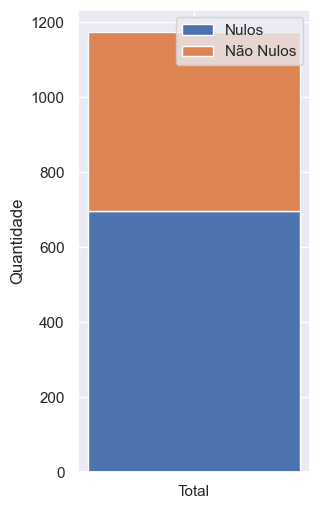

In [142]:
plt.figure(figsize=(3,6))

nulos = df['Linha de Trabalho'].isnull().sum()
N_nulos = df['Linha de Trabalho'].notnull().sum()

plt.bar('Total', nulos, label='Nulos')
plt.bar('Total', N_nulos, bottom=nulos, label='Não Nulos')

plt.ylabel('Quantidade')

plt.legend()

In [143]:
NA_Trabalho = df['Linha de Trabalho'].isna().sum()
print(f' Existem {NA_Trabalho} de índividuos que não possuem a linha de trabalho identificadas.')

 Existem 696 de índividuos que não possuem a linha de trabalho identificadas.


# Distribuição de Dados por Faixa Etária

[Text(0.5, 0, 'Idade (anos)'), Text(0, 0.5, 'Quantidade de Pessoas Avaliadas')]

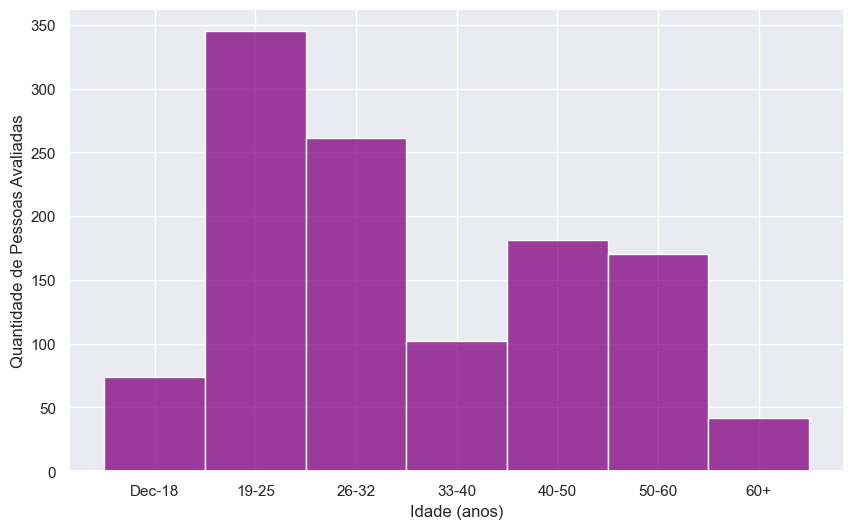

In [144]:
plt.figure(figsize=(10,6))

df['Idade (anos)'] = pd.Categorical(df['Idade (anos)'], categories=['Dec-18','19-25', '26-32', '33-40', '40-50', '50-60', '60+'], ordered=True)
ax = sns.histplot(x = 'Idade (anos)', color='purple',
              data = df)
ax.set(xlabel='Idade (anos)', ylabel='Quantidade de Pessoas Avaliadas')

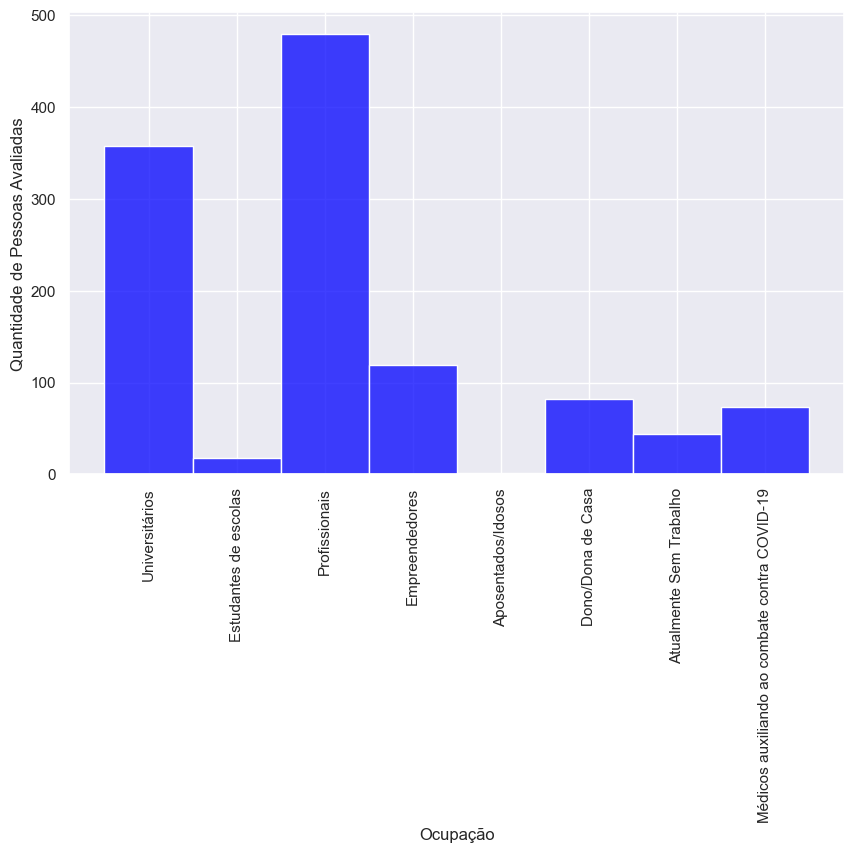

In [145]:
plt.figure(figsize=(10,6))

ax = sns.histplot(x = 'Ocupação', color='blue',
              data = df)
ax.set(xlabel='Ocupação', ylabel='Quantidade de Pessoas Avaliadas')
ax.tick_params(axis='x', rotation=90)

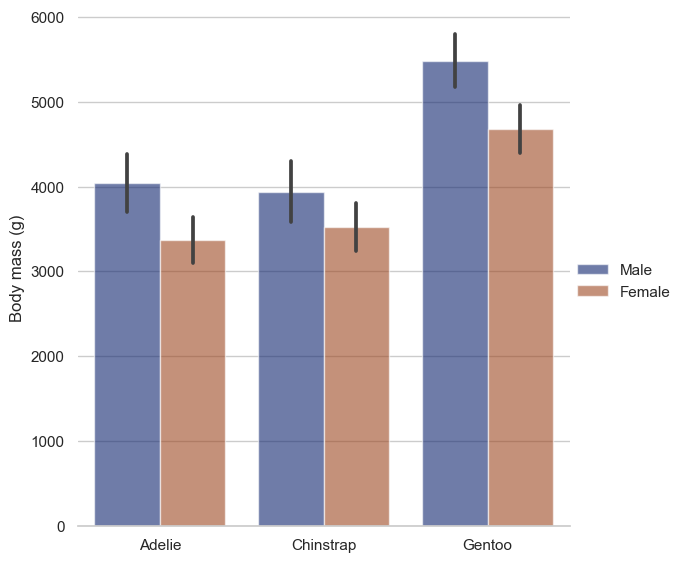

In [146]:
#Fazer gráfico comparando antes/depois. Usar algo parecido com isso
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# Matriz de Correlação

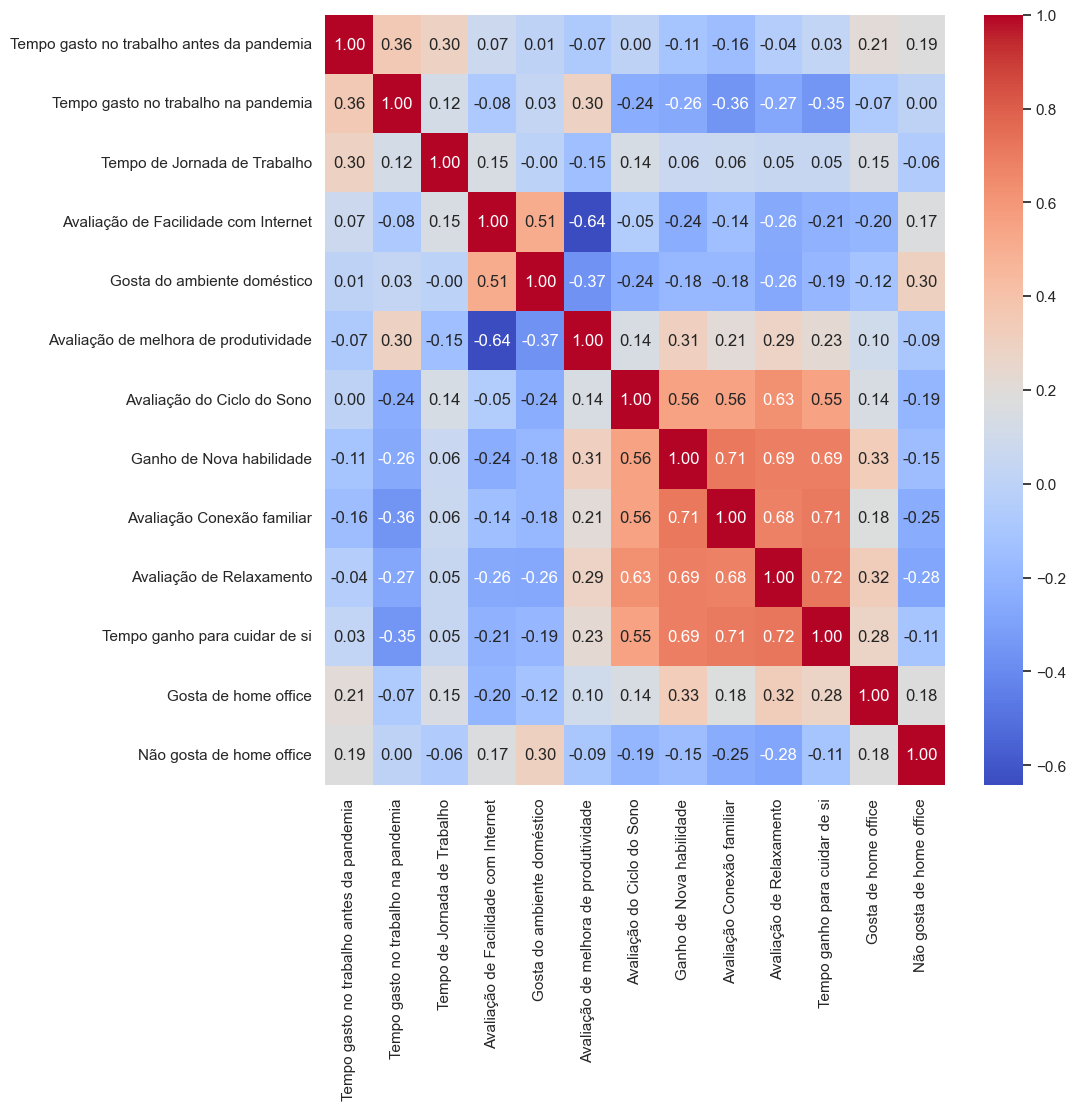

In [147]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm', fmt='.2f')

sns.set (rc = {'figure.figsize':(10, 10)})